In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation

In [49]:
#load the data
data=pd.read_csv(r"C:\Users\admin\Documents\GitHub\eda-for-conversion-rate-dataset\data\conversion_data.csv")

In [5]:
#read the sample data
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
#read the description
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [50]:
#remove the data which age is beyond 80
data=data[data["age"]<80]

# explotory data analysis

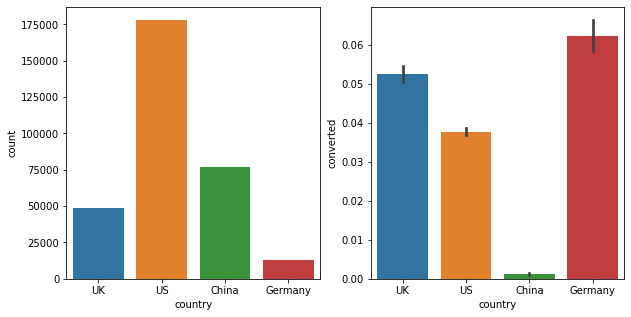

In [8]:
#explore the relationship between country and conversion_rate
fig, ax=plt.subplots(1,2,figsize=(10,5))
#plot the number of visitors by country
sns.countplot(x="country", data=data, ax=ax[0])
#plot the conversion rate of each country, barplot's default method is mean.
sns.barplot(x="country", y="converted", data=data, ax=ax[1])

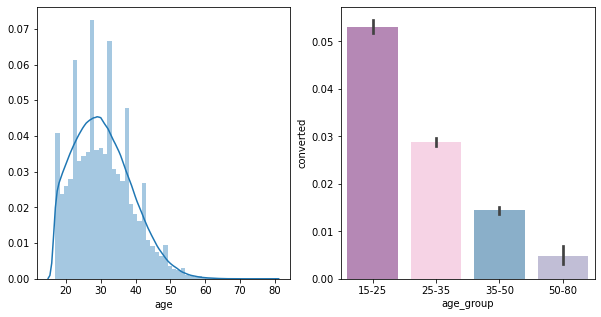

In [9]:
#explore the relationship between age and conversion rate
#cut the age to age group
age_group=pd.cut(data.loc[:,"age"],
                         bins=[15,25,35,50,80],
                        labels=["15-25","25-35","35-50","50-80"],
                        include_lowest=True)
data["age_group"]=age_group
fig, ax=plt.subplots(1,2,figsize=(10,5))
#plot the distribution of age
sns.distplot(data.age, ax=ax[0])
#plot the conversion rate by age-group
sns.barplot(x="age_group", y="converted", data=data, palette="Set3_r", ax=ax[1])

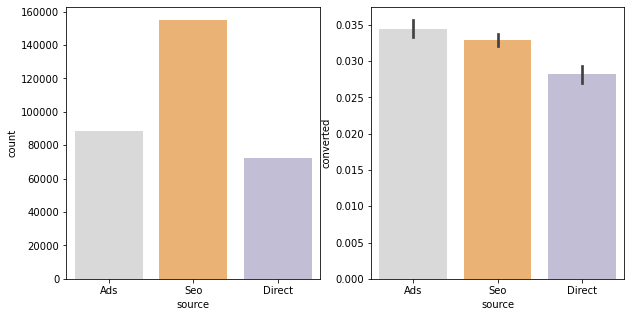

In [14]:
#explore the relationship between source and conversion rate
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x="source", data=data, ax=ax[0], palette="Set3_r")
sns.barplot(x="source", y="converted", data=data, ax=ax[1], palette="Set3_r")

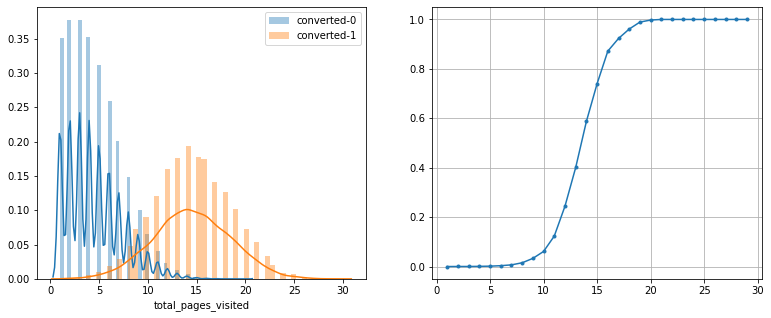

In [64]:
#explore the page visited and conversion rate
fig, ax=plt.subplots(1, 2, figsize=(13,5))
sns.distplot(data[data["converted"]==0]["total_pages_visited"], ax=ax[0], label="converted-0")
sns.distplot(data[data["converted"]==1]["total_pages_visited"], ax=ax[0], label="converted-1")
ax[0].legend()
grouped=data[["total_pages_visited", "converted"]].groupby("total_pages_visited")["converted"].mean()
plt.plot(grouped, ".-")
ax[1].grid()

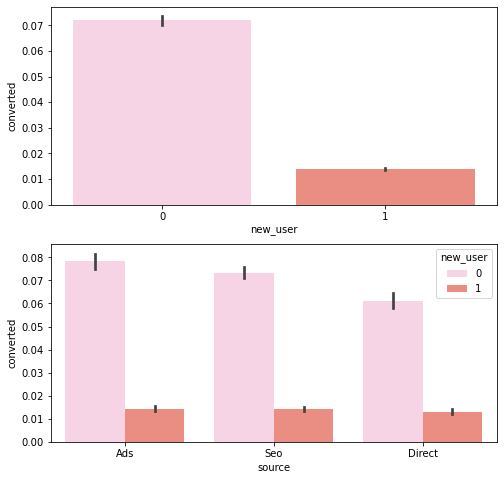

In [56]:
#let's explore the new visit and conversion rate
fig, ax=plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x="new_user", y="converted", data=data, palette="Set3_r", ax=ax[0])
sns.barplot(x="source", y="converted", hue="new_user", data=data, palette="Set3_r", ax=ax[1])
#ax[1].legend(["new","old"])

# machine Learning

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

In [71]:
#label the catagorical data to numeric data
data["country"]=LabelBinarizer().fit_transform(data.country)
data["source"]=LabelBinarizer().fit_transform(data.source)
#define the dependent and independent variables
x=data.drop("converted", axis=1)
y=data.converted
#split the data into train and test
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

In [74]:
#define the random forest model
model=RandomForestClassifier()
model.fit(x_train, y_train)

In [92]:
#extract the train_score and test_score from learning curve function
train_sizes, train_scores, test_scores=learning_curve(model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 9))

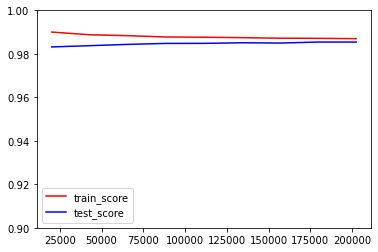

In [99]:
#calculate the mean train score and test score for each batch of dataset
train_scores_mean=np.mean(train_scores, axis=1)
test_scores_mean=np.mean(test_scores, axis=1)
#plot the train score and test score
plt.plot(train_sizes, train_scores_mean, color="r", label="train_score")
plt.plot(train_sizes, test_scores_mean, color="b", label="test_score")
plt.ylim(0.9,1)
plt.legend()

In [77]:
#predict test data
y_pred=model.predict(x_test)
#generate the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61171
           1       0.84      0.66      0.74      2069

    accuracy                           0.98     63240
   macro avg       0.92      0.83      0.87     63240
weighted avg       0.98      0.98      0.98     63240

